### Day 20 - Predicting Iris Flower using  SVM and Random Forest Algorithm
November 3, 2019

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

%matplotlib inline

In [6]:
iris_raw = load_iris()

In [8]:
print(iris_raw.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
iris_raw.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [13]:
iris_raw.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
iris_raw.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

##### Converting to Pandas dataframe

In [16]:
iris = pd.DataFrame(data=iris_raw.data, columns=iris_raw.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
iris['species'] = iris_raw.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
iris['species_name'] = iris.species.apply(lambda x: iris_raw.target_names[x])
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


#### Exploratory Data Analysis

**Observations**
1. no missing data
2. the target is balanced each has 50 samples

In [22]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null int32
species_name         150 non-null object
dtypes: float64(4), int32(1), object(1)
memory usage: 6.5+ KB


In [23]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [26]:
iris['species_name'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species_name, dtype: int64

#### Plotting some Visualization

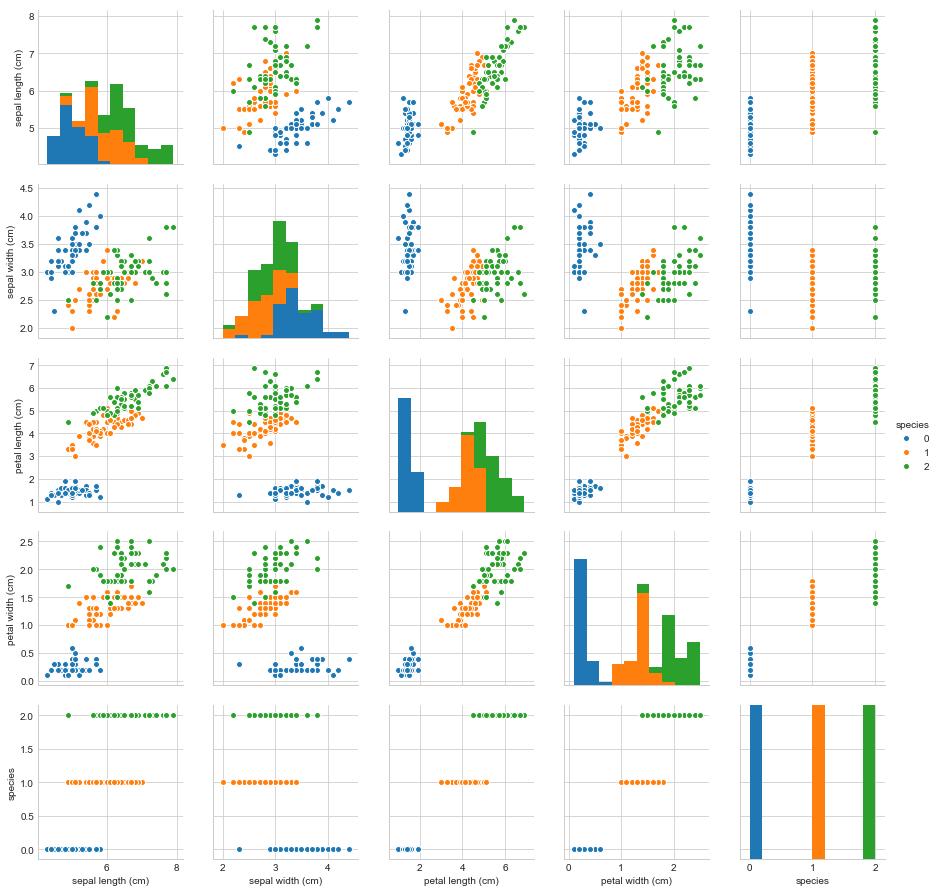

In [31]:
sns.pairplot(data=iris,hue='species')

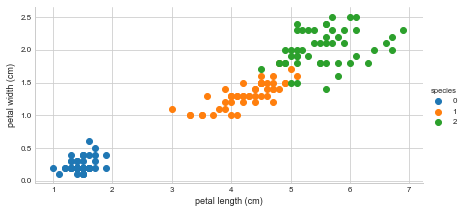

In [38]:
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.FacetGrid(data=iris,hue='species', aspect= 2)\
.map(plt.scatter, 'petal length (cm)', 'petal width (cm)')\
.add_legend()

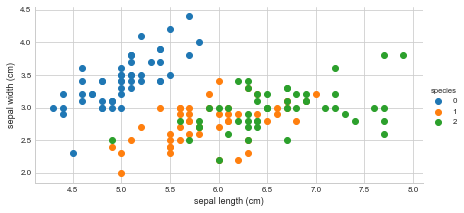

In [39]:
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.FacetGrid(data=iris,hue='species', aspect= 2)\
.map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)')\
.add_legend()

#### Create the Model

1. Random Forest Classifier
2. Support Vector Machine

In [72]:
X = iris.drop(['species', 'species_name'], axis=1)
y = iris.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [73]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=100,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

In [74]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [75]:
prediction = rf.predict(X_test)

In [76]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print(accuracy_score(y_test, prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.94      0.94      0.94        18
          2       0.92      0.92      0.92        13

avg / total       0.96      0.96      0.96        45



[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


0.9555555555555556


#### Creating SVM Model

In [77]:
svm = SVC()

In [78]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
prediction = svm.predict(X_test)

In [80]:
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print(accuracy_score(y_test, prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      0.94      0.97        18
          2       0.93      1.00      0.96        13

avg / total       0.98      0.98      0.98        45



[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


0.9777777777777777
